<a href="https://colab.research.google.com/github/avaf4/sound_waves_project/blob/main/Flanigan_Jones_Final_Project_Sound_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

from google.colab import drive
drive.mount('/content/drive')



filename = '/content/drive/MyDrive/440.wav'
y,sr = librosa.load(filename, sr = 2)

Mounted at /content/drive


In [ ]:
hopLength = 512

D = librosa.stft(y)

S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)

#Seperating harmonic and percusive sequence
y_harmonic, y_percusive = librosa.effects.hpss(y)

#Detecting the pitches
pitches, magnitudes = librosa.core.piptrack(y=y_harmonic, sr=sr)

#Most prominent pitches
pitchValues = []
for i in range(pitches.shape[1]):
    index = magnitudes[:, i].argmax()
    pitch = pitches[index, i]
    pitchValues.append(pitch)


#Convert frequency to note
def freq_to_midi_note(freq):
    return librosa.hz_to_midi(freq)


midi_notes = [freq_to_midi_note(pitch) for pitch in pitchValues]
print(midi_notes)











/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=20
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=20
  warnings.warn(


[-inf]


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=20
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/convert.py:1095: RuntimeWarning: divide by zero encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


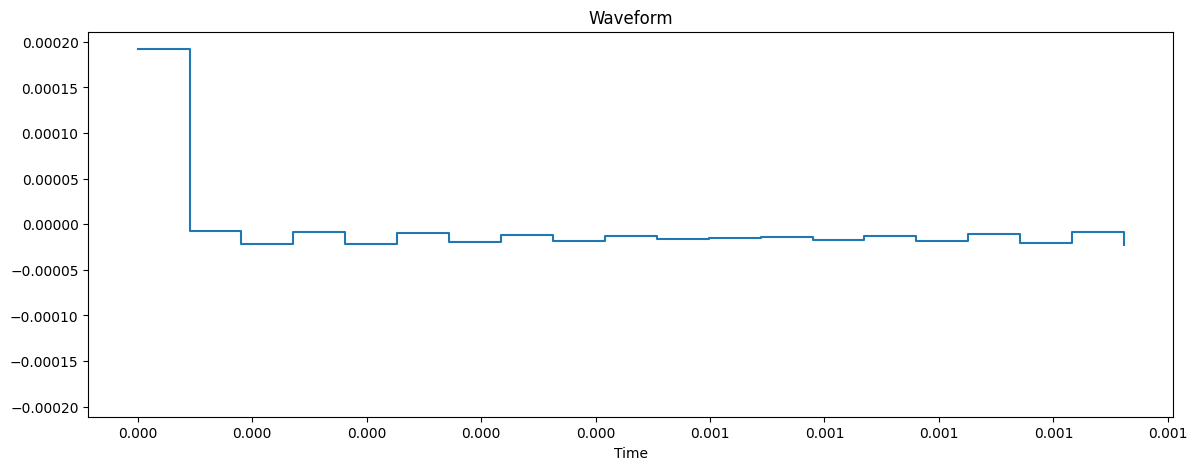

In [ ]:
#Plot waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y)
plt.plot(pitches.T, color='r')
plt.title('Waveform')
plt.show()

<ipython-input-6-ac7c309696fe>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='cqt_note')


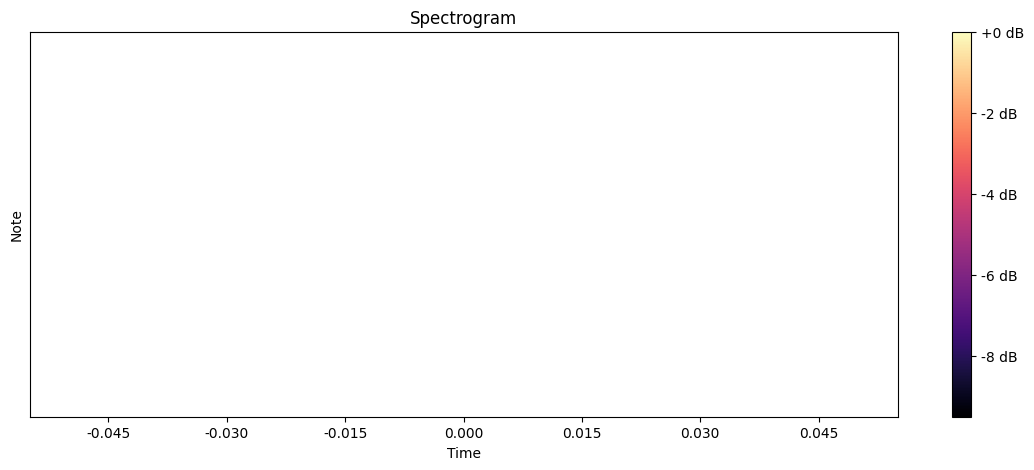

In [ ]:
#Plot spectrograph
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

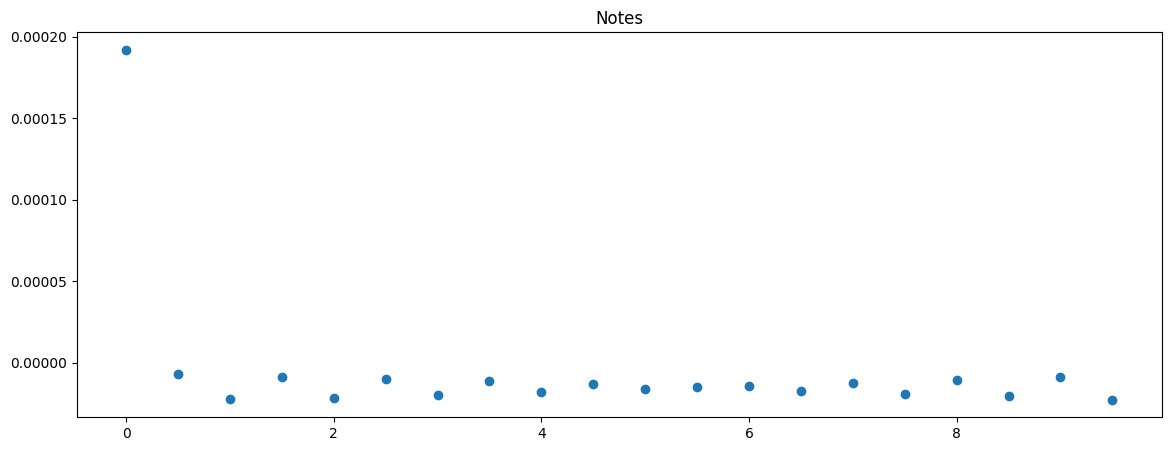

[0.0]


In [ ]:
#plot individual notes
plt.figure(figsize=(14, 5))
times = librosa.times_like(pitches)
x = [t*.5 for t in range(len(y))]
notesGraph = plt.plot(x, y, marker = 'o', linestyle = 'None')

plt.title('Notes')
plt.show()

times = list(times)
print(times)

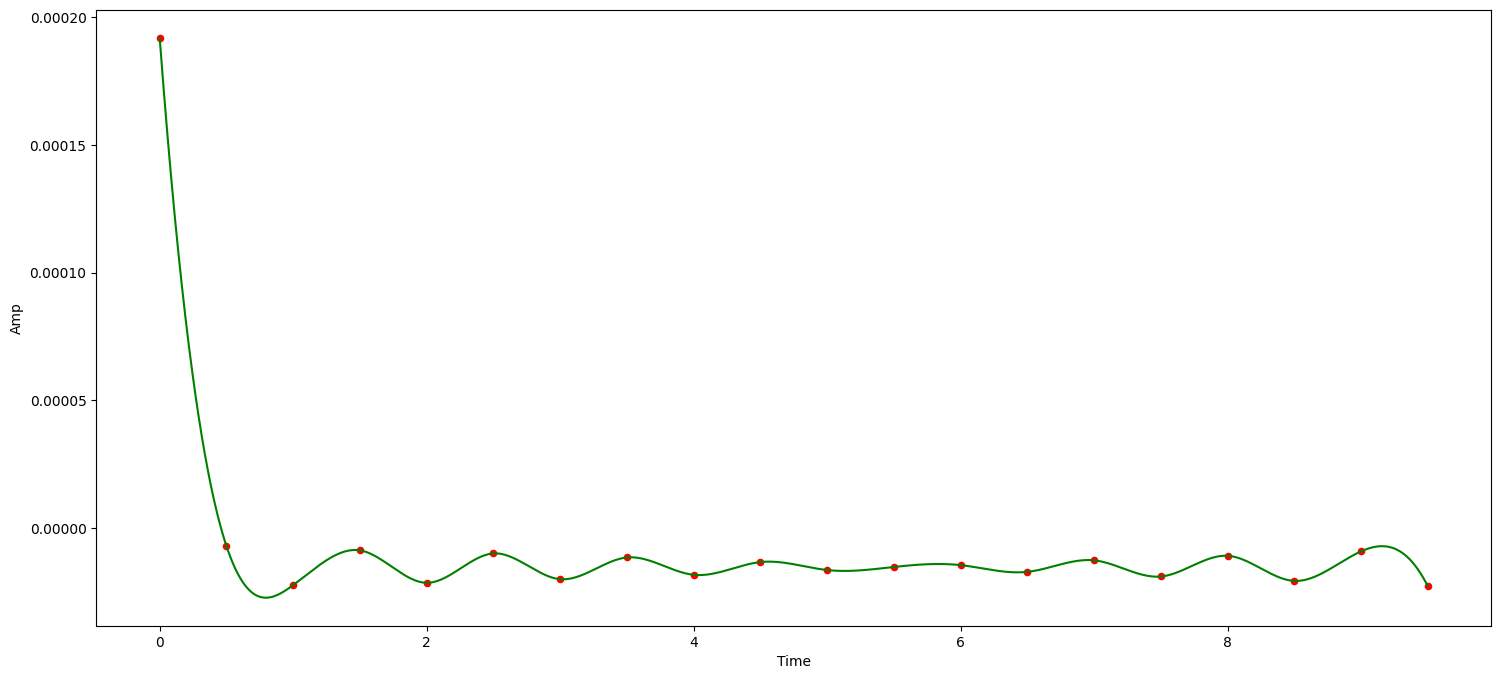

In [ ]:
#Cubic Spline
import pandas as pd
from scipy.interpolate import CubicSpline


df = pd.DataFrame({"Time": list(x), "Amp":list(y)})

# Find our interpolating polynomial using the "CubicSpline" function
cubic_spline = CubicSpline(x,y)
# Find the approximate y values for our set of x values we'll plot

x_label = df.columns[0]
y_label = df.columns[1]

# Lets set our x min/max values
xmin = df[x_label].min()
xmax = df[x_label].max()

# Let's set the x min/max that we're going to use for graphing
x_graph = np.linspace(xmin,xmax,1000000)

y_graph = cubic_spline(x_graph)

# PLOTING!!

# Start a figure and axes and set the size
fig, ax = plt.subplots(figsize=(18, 8))

# Plot our original data points
df.plot.scatter(x=x_label, y=y_label, color='red',ax=ax)

# plot the x_graph and y_graphs which correspond to our approximation
ax.plot(x_graph, y_graph,color='green')


Number of seconds: 1


<Axes: xlabel='Time', ylabel='Height'>

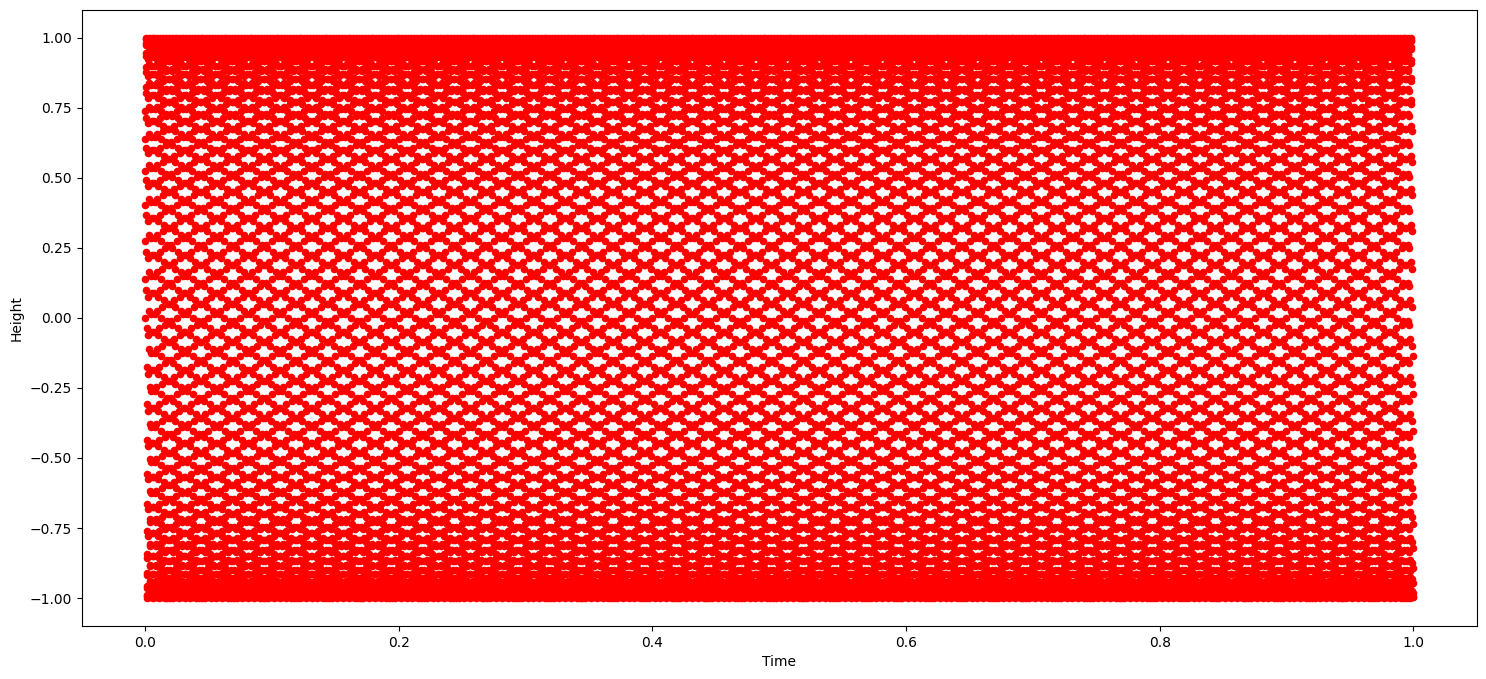

In [ ]:
import math
import matplotlib.pyplot as plt

total_seconds = float(input("Number of seconds: "))
sample_rate = 20000

waveheight = []
time = []

for sample in range(0,int(total_seconds*sample_rate)):
  time.append(sample/sample_rate)
  waveheight.append(math.sin(440*(2*math.pi)*(sample/sample_rate)))

df = pd.DataFrame({"Time": time, "Height" : waveheight})


x_label = df.columns[0]
y_label = df.columns[1]

# Lets set our x min/max values
xmin = df[x_label].min()
xmax = df[x_label].max()

# Let's set the x min/max that we're going to use for graphing
x_graph = np.linspace(xmin,xmax,100)


# Start a figure and axes and set the size
fig, ax = plt.subplots(figsize=(18, 8))

# Plot our original data points
df.plot.scatter(x=x_label, y=y_label, color='red',ax=ax)



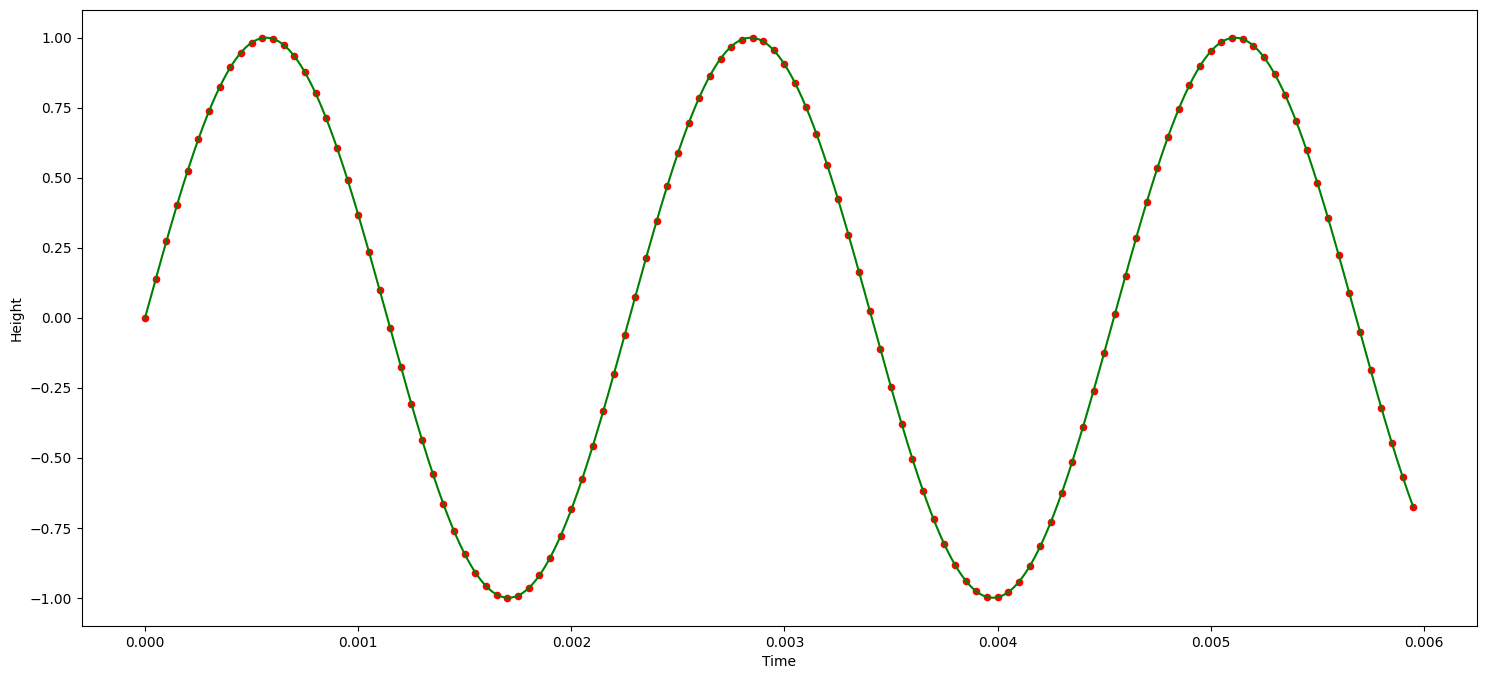

In [ ]:
cubic_spline = CubicSpline(df[x_label], df[y_label])

# Let's set the x min/max that we're going to use for graphing
x_graph = np.linspace(xmin,xmax,1000000)

y_graph = cubic_spline(x_graph)

# PLOTING!!

# Start a figure and axes and set the size
fig, ax = plt.subplots(figsize=(18, 8))

# Plot our original data points
df.plot.scatter(x=x_label, y=y_label, color='red',ax=ax)

# plot the x_graph and y_graphs which correspond to our approximation
ax.plot(x_graph, y_graph,color='green')

In [ ]:
cd = cubic_spline.derivative()

roots = cd.roots()
print(roots)

approximation = 0
if total_seconds % 2 == 0:
  for estimate in range(0,len(roots)-1,2):
    distance = abs(roots[estimate]-roots[estimate+2])
    approximation += distance
  approximation = approximation/((len(roots)-1)/2)
else:
  for estimate in range(0,len(roots)-2,2):
    distance = abs(roots[estimate]-roots[estimate+2])
    approximation += distance
  approximation = approximation/((len(roots)-2)/2)

hz = 1/approximation


print('The note is', round(hz,2), 'hertz.')

[-0.00051647  0.00056818  0.00170454  0.00284092  0.00397727  0.00511363
  0.00621778]
The note is 371.24 hertz.


  .

.

In [ ]:
#Spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [ ]:
#Chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show

In [ ]:

noteDict = {
    '523.3':'C',
    '554.4':'C#',
    '587.3':'D',
    '622.3':'Eb',
    '659.3':'E',
    '698.5':'F',
    '740.0':'F#',
    '784.0':'G',
    '830.6':'G#',
    '880.0':'A',
    '932.3':'Bb',
    '987.8':'B',
}

